In [1]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ver = pd.read_csv('./data/merged_ver1_0.csv',index_col=0)

C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
log = pd.read_csv('./data/hj_log_data.csv')

In [4]:
ver['loanapply_insert_time']=ver['loanapply_insert_time'].str[:10]

In [5]:
ver['a']=ver['user_id'].astype(str)+ver['loanapply_insert_time']

In [6]:
log['a']=log['user_id'].astype(str)+log['date_cd']

In [7]:
pd.merge(ver,log,on='a').shape

(2399712, 40)

In [8]:
ver.isnull().sum()

index                                       0
application_id                              0
user_id                                     0
birth_year                              20771
gender                                  20771
insert_time                                 0
credit_score                           249504
yearly_income                               0
income_type                                 0
company_enter_month                     58008
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             562201
personal_rehabilitation_complete_yn    562201
existing_loan_cnt                      514053
existing_loan_amt                      744017
loanapply_insert_time                       0
bank_id                                     0
product_id                                  0
loan_limit                        

In [9]:
pd.merge(ver,log,on='a').isnull().sum()

index                                       0
application_id                              0
user_id_x                                   0
birth_year                              19257
gender                                  19257
insert_time                                 0
credit_score                           147900
yearly_income                               0
income_type                                 0
company_enter_month                     51046
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             486644
personal_rehabilitation_complete_yn    486644
existing_loan_cnt                      400162
existing_loan_amt                      623421
loanapply_insert_time                       0
bank_id                                     0
product_id                                  0
loan_limit                        

In [10]:
ver['b']=ver['user_id'].astype(str)+ver['insert_time']

In [11]:
log.shape

(2728153, 16)

In [12]:
ver.shape

(2586455, 26)

In [13]:
a_set=set(pd.merge(ver,log,on='a')['a'])

In [14]:
a_set.issubset(set(log['a']))

True

In [15]:
set(log['a']).issubset(set(ver['a']))

False

In [16]:
set(log['a']).issubset(set(ver['b']))

False

In [17]:
len(set(log['a']) | (set(ver['a'])))

2739721

In [18]:
users=list(ver['user_id'].value_counts())

In [19]:
df_INNER_JOIN = pd.merge(log, ver, on='user_id', how='inner')

In [20]:
df_INNER_JOIN

,Unnamed: 0,user_id,date_cd,n_events,event_SignUp,event_OpenApp,event_Login,event_ViewLoanApplyIntro,event_StartLoanApply,event_CompleteIDCertification,...,existing_loan_cnt,existing_loan_amt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,a_y,b
0,3,9,2022-05-21,3,0,0,0,0,0,0,...,1.0,NaN,2022-05-21,38,134,16000000.0,7.5,0.0,92022-05-21,92022-05-21 23:41:09
1,3,9,2022-05-21,3,0,0,0,0,0,0,...,1.0,NaN,2022-05-21,59,150,20000000.0,15.0,0.0,92022-05-21,92022-05-21 23:41:09
2,3,9,2022-05-21,3,0,0,0,0,0,0,...,1.0,NaN,2022-05-21,59,251,16000000.0,6.5,0.0,92022-05-21,92022-05-21 23:41:09
3,3,9,2022-05-21,3,0,0,0,0,0,0,...,1.0,NaN,2022-05-21,27,148,16000000.0,7.0,0.0,92022-05-21,92022-05-21 23:41:09
4,3,9,2022-05-21,3,0,0,0,0,0,0,...,1.0,NaN,2022-05-21,35,168,28000000.0,16.8,0.0,92022-05-21,92022-05-21 23:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29009800,524194,169190,2022-03-30,2,0,0,0,0,0,0,...,1.0,5000000.0,2022-03-30,63,226,10000000.0,18.7,0.0,1691902022-03-30,1691902022-03-30 08:04:55
29009801,524194,169190,2022-03-30,2,0,0,0,0,0,0,...,1.0,5000000.0,2022-03-30,36,103,12000000.0,8.9,0.0,1691902022-03-30,1691902022-03-30 08:04:55
29009802,524194,169190,2022-03-30,2,0,0,0,0,0,0,...,1.0,5000000.0,2022-03-30,19,127,12000000.0,9.4,0.0,1691902022-03-30,1691902022-03-30 08:04:55
29009803,524194,169190,2022-03-30,2,0,0,0,0,0,0,...,1.0,5000000.0,2022-03-30,49,136,12000000.0,6.5,0.0,1691902022-03-30,1691902022-03-30 08:04:55


In [21]:
df_INNER_JOIN.isnull().sum()

Unnamed: 0                                   0
user_id                                      0
date_cd                                      0
n_events                                     0
event_SignUp                                 0
event_OpenApp                                0
event_Login                                  0
event_ViewLoanApplyIntro                     0
event_StartLoanApply                         0
event_CompleteIDCertification                0
event_EndLoanApply                           0
event_UseLoanManage                          0
event_UsePrepayCalc                          0
event_UseDSRCalc                             0
event_GetCreditInfo                          0
a_x                                          0
index                                        0
application_id                               0
birth_year                               43066
gender                                   43066
insert_time                                  0
credit_score 

In [22]:
df_INNER_JOIN.columns

Index(['Unnamed: 0', 'user_id', 'date_cd', 'n_events', 'event_SignUp',
       'event_OpenApp', 'event_Login', 'event_ViewLoanApplyIntro',
       'event_StartLoanApply', 'event_CompleteIDCertification',
       'event_EndLoanApply', 'event_UseLoanManage', 'event_UsePrepayCalc',
       'event_UseDSRCalc', 'event_GetCreditInfo', 'a_x', 'index',
       'application_id', 'birth_year', 'gender', 'insert_time', 'credit_score',
       'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'loanapply_insert_time',
       'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied', 'a_y',
       'b'],
      dtype='object')

In [23]:
points = df_INNER_JOIN[['date_cd', 'n_events', 'event_ViewLoanApplyIntro',\
        'event_StartLoanApply', 'event_CompleteIDCertification','event_EndLoanApply',\
        'event_UseLoanManage','event_UseLoanManage','event_UsePrepayCalc',\
        'event_UseDSRCalc','event_GetCreditInfo','a_x','birth_year','gender',\
        'credit_score','yearly_income','income_type','company_enter_month',\
        'employment_type','houseown_type','desired_amount','purpose','personal_rehabilitation_yn',\
        'personal_rehabilitation_complete_yn','existing_loan_cnt','existing_loan_amt',\
        'bank_id','product_id','loan_limit','loan_rate', 'is_applied','a_y']]

In [24]:
idx = points[(points['existing_loan_amt'].isnull() == True) & (points['existing_loan_cnt'] == 1)].index

In [25]:
idx = points[(points['existing_loan_cnt'].isnull() == True)].index
points.loc[idx, ['existing_loan_cnt', 'existing_loan_amt']] = 0

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
points.dropna(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
processed_data = points[points['is_applied'] == 1].copy()
feature = processed_data[['credit_score', 'loan_rate']]

In [28]:
model = KMeans(n_clusters = 3)
ids = model.fit_predict(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

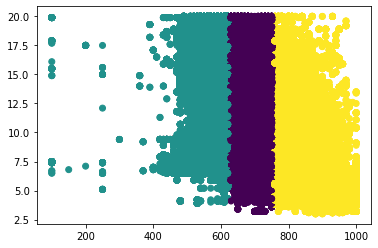

In [30]:
plt.title("K value = {}".format(3))
plt.xlabel('credit_score')
plt.ylabel('loan_rate')
plt.scatter(processed_data['credit_score'], processed_data['loan_rate'], c=ids)  
plt.show()

In [31]:
def clustering(app, name, f1, f2):
    feature = points[points['is_applied'] == app].copy()[['credit_score', 'loan_rate']]
    model = KMeans(n_clusters = 3)
    ids = model.fit_predict(feature)
    predict = pd.DataFrame(model.predict(feature))
    predict.columns=['predict']
    plt.title(f"K value = {name}")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.scatter(points[points['is_applied'] == app].copy()[f1], points[points['is_applied'] == app].copy()[f2], c=ids)
    plt.savefig(f'./visual2/{name}.jpg')
    plt.show()

In [ ]:
for p1 in points:
    for p2 in points:
        name = p1 +'+'+ p2
        clustering(0, name, p1,p2)
        clustering(1, name, p1,p2)